In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
combined = pd.concat([df, df_test])

In [5]:
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace = True)

In [6]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

In [7]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [8]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
#find minors and adults, to check if more minors survived
df['Adult'] = 0
df['Adult'][df['Age'] >=18] = 1

C:\Users\Andreea STROIA\AppData\Local\Temp\ipykernel_7180\473588002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Adult'][df['Age'] >=18] = 1


In [10]:
df.groupby(['Adult'])['PassengerId'].count()

Adult
0    113
1    778
Name: PassengerId, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

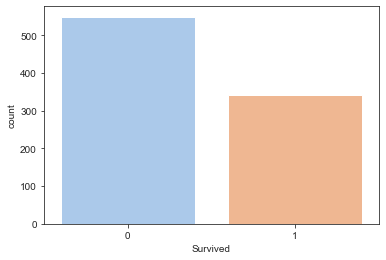

In [12]:
sns.set_style('ticks')
sns.countplot(x='Survived',data=df,palette='pastel')

In [13]:
count_no_surv = len(df[df['Survived']==0])
count_surv = len(df[df['Survived']==1])
pct_of_no_surv = count_no_surv/(count_no_surv+count_surv)
print("percentage of people who  didnt survive", pct_of_no_surv*100)
pct_of_surv = count_surv/(count_no_surv+count_surv)
print("percentage of people who survived", pct_of_surv*100)

percentage of people who  didnt survive 61.61616161616161
percentage of people who survived 38.38383838383838


Text(0, 0.5, 'Survivability Class')

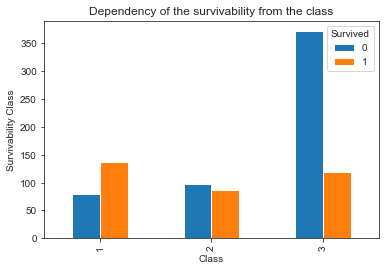

In [18]:
%matplotlib inline
pd.crosstab(df['Pclass'], df['Survived']).plot(kind='bar')
plt.title('Dependency of the survivability from the class')
plt.xlabel('Class')
plt.ylabel('Survivability Class')

In [ ]:
Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logisticRegr = LogisticRegression()

In [57]:
df = pd.get_dummies(df)
df.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Adult,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,2,1,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,2,1,1,0,1,0,0


In [29]:
from sklearn.model_selection import train_test_split
PredictorColumns = ['Pclass', 'Age', 'Family', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
TargetColumn = 'Survived'

In [30]:
x = df[PredictorColumns].values
y = df[TargetColumn].values

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [65]:
logisticRegr.fit(x_train, y_train)

C:\Users\Andreea STROIA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
predictions = logisticRegr.predict(x_test)

In [69]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.441768
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.337     
Dependent Variable: y                AIC:              803.2311  
Date:               2022-10-17 14:38 BIC:              841.5698  
No. Observations:   891              Log-Likelihood:   -393.62   
Df Model:           7                LL-Null:          -593.33   
Df Residuals:       883              LLR p-value:      3.1699e-82
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -1.0931      0.1434    -7.6252    0.0000    -1.3740    -0.8121
x2    -0.0384      0.0078    -4.9194    0.0000    -0.0

In [70]:
from sklearn.metrics import accuracy_score
score=accuracy_score(predictions,y_test)
print(score)

0.7649253731343284


In [71]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Adult,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,2,1,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,2,1,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,1,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,2,1,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,1,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,1,1,0,0,0,1
888,889,0,3,28.0,1,2,23.4500,4,1,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,1,0,1,1,0,0


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)

In [73]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\Users\Andreea STROIA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       154
           1       0.77      0.63      0.70       114

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268



In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[133  21]
 [ 42  72]]


In [54]:
print(predictions)

[0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1]


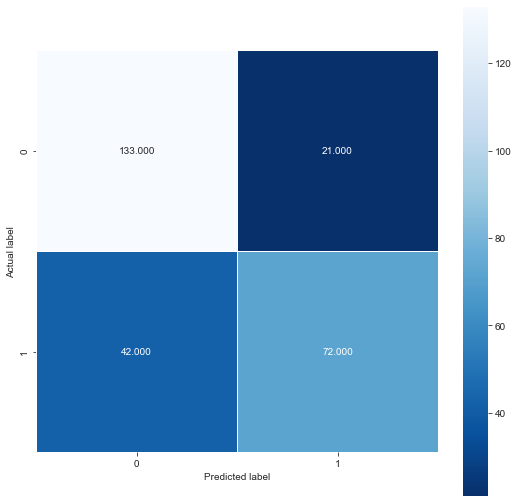

In [52]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');